# Data and Library Consolidation

## Import Libraries used in notebook

In [1]:
import pandas as pd # For working with dataframes
from sklearn import decomposition # For performing PCA on the data
from sklearn.model_selection import train_test_split #Data splitting
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier for training
import matplotlib.pyplot as plt # For plotting visualizations of analysis
import altair as alt # For additional plotting functionality
import warnings # Suppress warnings from output

## Import and look at the snps data for the samples

In [2]:
df = pd.read_csv('matrix_10step.csv')
df

,Unnamed: 0,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
0,HG00096,0,1,0,0,1,0,0,0,0,...,1,2,0,0,1,0,0,0,0,GBR
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,1,0,0,1,0,1,0,...,0,2,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,1,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI


## Provide the appropriate label for the unnamed column --> Samples. The rest of the columns refer to the snps

In [3]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True) #The columns correspond to the specific snp that is present (1) or absent (0)
df.head()

,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
0,HG00096,0,1,0,0,1,0,0,0,0,...,1,2,0,0,1,0,0,0,0,GBR
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,1,0,0,1,0,1,0,...,0,2,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR


## Import population data

In [22]:
pop_df = pd.read_csv('igsr_populations.tsv', sep='\t')
print(f'Size of df: {pop_df.shape}')
pop_df.head()

Size of df: (212, 11)


,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NaN,BrahminSGDP,Brahmin,Brahmin in India (SGDP),17.70000,83.300000,NaN,South Asia (SGDP),#008c1e,18,Simons Genome Diversity Project
3,NaN,MiaoSGDP,Miao,Miao in China (SGDP),28.00000,109.000000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
4,NaN,KyrgyzSGDP,Kyrgyz,Kyrgyz in Kyrgyzystan (SGDP),42.90000,74.600000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project


## Separate data into training. validation and test sets

In [5]:
train_set, testing_set = train_test_split(df, test_size = 0.3, stratify = df['Population code'])
validation_test, test_set = train_test_split(testing_set, test_size = 0.5, stratify = testing_set['Population code'])
print(train_set.shape)
train_set.head()

(764, 49434)


,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
695,NA19036,1,1,1,0,0,1,1,1,0,...,0,2,0,0,1,0,0,0,0,LWK
766,NA19207,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,YRI
200,HG00452,1,1,1,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,CHS
564,NA18597,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,CHB
491,NA12872,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,CEU


# Data Processing Steps

## Add the demographical data

In [6]:
train_set = train_set.merge(pop_df, on='Population code', how='inner') # Merge the demographical data  to the df with principal component values
print(f'Size of df: {train_set.shape}')
train_set.head()

Size of df: (764, 49444)


,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,NA19036,1,1,1,0,0,1,1,1,0,...,LWK,Luhya,"Luhya in Webuye, Kenya",-1.270000,36.610000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA19207,0,0,0,0,0,0,0,0,0,...,YRI,Yoruba,"Yoruba in Ibadan, Nigeria",7.400000,3.920000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00452,1,1,1,0,1,1,1,1,0,...,CHS,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA18597,0,0,0,0,0,0,0,0,0,...,CHB,Han Chinese,"Han Chinese in Beijing, China",39.916666,116.383333,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA12872,0,1,0,0,0,0,0,0,0,...,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,40.767000,-111.890400,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Separate the categorical and numerical data

In [20]:
# Select all numerical columns
snps_df = train_set.select_dtypes(include=['number'])
meta_df = train_set.select_dtypes(exclude=['number'])
print(snps_df.shape)
meta_df

(764, 49435)


,Sample,Population code,Population elastic ID,Population name,Population description,Superpopulation code,Superpopulation name,Superpopulation display colour,Data collections
0,NA19036,LWK,LWK,Luhya,"Luhya in Webuye, Kenya",AFR,African Ancestry,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA19207,YRI,YRI,Yoruba,"Yoruba in Ibadan, Nigeria",AFR,African Ancestry,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00452,CHS,CHS,Southern Han Chinese,Han Chinese South,EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA18597,CHB,CHB,Han Chinese,"Han Chinese in Beijing, China",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA12872,CEU,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...
759,NA18949,JPT,JPT,Japanese,"Japanese in Tokyo, Japan",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
760,NA18861,YRI,YRI,Yoruba,"Yoruba in Ibadan, Nigeria",AFR,African Ancestry,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
761,NA20785,TSI,TSI,Toscani,Toscani in Italy,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
762,NA19131,YRI,YRI,Yoruba,"Yoruba in Ibadan, Nigeria",AFR,African Ancestry,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Create models for training and fit it to the data

In [24]:
rfclass = RandomForestClassifier() # n_estimators=100,max_features='sqrt',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,random_state=42,class_weight='balanced'
rfclass

RandomForestClassifier()

## Create Dummies for the Superpopulation categories using One-Hot Encoding

In [25]:
meta_df = pd.get_dummies(meta_df, columns=['Superpopulation name'])

In [26]:
meta_df.head()

,Sample,Population code,Population elastic ID,Population name,Population description,Superpopulation code,Superpopulation display colour,Data collections,Superpopulation name_African Ancestry,Superpopulation name_American Ancestry,Superpopulation name_East Asian Ancestry,Superpopulation name_European Ancestry
0,NA19036,LWK,LWK,Luhya,"Luhya in Webuye, Kenya",AFR,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",True,False,False,False
1,NA19207,YRI,YRI,Yoruba,"Yoruba in Ibadan, Nigeria",AFR,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",True,False,False,False
2,HG00452,CHS,CHS,Southern Han Chinese,Han Chinese South,EAS,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,True,False
3,NA18597,CHB,CHB,Han Chinese,"Han Chinese in Beijing, China",EAS,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,True,False
4,NA12872,CEU,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,EUR,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,False,True


## The fit parameters to quality of fit

In [13]:
# This attribute provides the percentage of the dataset's variance that is captured by each principal component.
# It helps to determine how much information (variance) each component holds relative to the total variance of the original dataset.
print(f' Explained Variance Ratio: {pca.explained_variance_ratio_}') # The higher the stronger

## This attribute contains the singular values of the data matrix after applying PCA. Singular values are derived from the
## Singular Value Decomposition (SVD) and are related to the importance of each principal component.
print(f' Singular Values: {pca.singular_values_}') # The higher the stronger

 Explained Variance Ratio: [0.08253525 0.05412034]
 Singular Values: [188.93732058 152.99536559]


## Transform the matrix into the principal component basis --> Expect each sample to have 2 values, i.e. shape = (#samples, 2)

In [15]:
to_plot = pca.transform(matrix)
to_plot.shape

(1092, 2)

## Plot the data in the principal component space --> Looks like roughly 3 clusters

Text(0, 0.5, 'PC1')

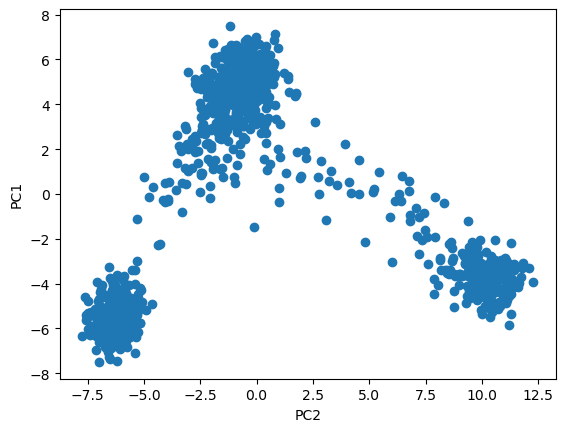

In [18]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])
plt.xlabel('PC2')
plt.ylabel('PC1')

## Now lets add the categorical data back to see if the clustering correlates with any features

In [41]:
df_plot = df[non_snp_columns].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [42]:
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273754
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


### The unique populations:

In [43]:
df_plot['Population code'].unique() # A lot more populations than there are clusters

array(['GBR', 'FIN', 'CHS', 'PUR', 'CLM', 'IBS', 'CEU', 'YRI', 'CHB',
       'JPT', 'LWK', 'ASW', 'MXL', 'TSI'], dtype=object)

In [44]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## It's unclear if there's any clustering of populations here, so let's import more demographical data
## Sample data from the thousand genomes project:

Size of df: (1092, 14)


,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Plot PCA with superpopulation category as the color outline and population code as the fill color

In [49]:
# Suppress all warnings
warnings.filterwarnings('ignore', category = FutureWarning)
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    fill='Population code'
)

alt.Chart(...)

# __Observations:__
## --> Looks like the data clusters pretty well by 3 major superpopulations: African, East Asian, and European!
## --> Americans primarily cluster around the European Ancestry cluster with some bleedthrough to other population clusters, which is expected as Europeans descendants are the biggest American group. 

# tSNE

In [51]:
X = matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
X_embedded.shape

(1092, 2)

In [52]:
df_plot['tsne1'] = X_embedded[:,0]
df_plot['tsne2'] = X_embedded[:,1]

In [53]:
df_plot.head()

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections,tsne1,tsne2
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-14.476787,-6.910707
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-5.809021,-4.587399
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-9.813315,1.099325
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.120430,-9.016066
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-6.542269,-5.621799


## Let's try tSNE instead to try to catch for any non-linear effects:
### By Superpopulation

In [54]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

### By Population

In [56]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

## I want to take a deeper look into the American Superpopulation

In [65]:
american_df = df_plot[df_plot['Superpopulation name'] == 'American Ancestry']
euro_amer_df = df_plot[(df_plot['Superpopulation name'] == 'American Ancestry') | (df_plot['Superpopulation name'] == 'European Ancestry')]

In [91]:
# Create the first chart for euro_amer_df
chart1 = alt.Chart(euro_amer_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

# Create the second chart for american_df
chart2 = alt.Chart(american_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population name', scale=alt.Scale(scheme='category20'))
)

# Combine the charts
combined_chart = alt.layer(chart1, chart2)

# Display the combined chart
combined_chart

alt.LayerChart(...)

In [81]:
print(american_df['Population name'].unique())
print(euro_amer_df['Superpopulation name'].unique())

['Puerto Rican' 'Colombian' 'Mexican Ancestry']
['European Ancestry' 'American Ancestry']


In [94]:
# Define subdued color scale for chart 1
subdued_color_scale = alt.Scale(domain=['European Ancestry', 'American Ancestry'],
                                 range=['#d9d9d9', '#b0b0b0'])  # Example subdued colors
# Create the first chart for euro_amer_df
chart1 = alt.Chart(euro_amer_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=subdued_color_scale)
)

# Define vibrant color scale for chart 2
vibrant_color_scale = alt.Scale(domain=['Puerto Rican', 'Colombian', 'Mexican Ancestry'],
                                 range=['blue','yellow','red'])  # Example vibrant colors

# Create the second chart for american_df with vibrant colors
chart2 = alt.Chart(american_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population name', scale=vibrant_color_scale)
)
# Combine the charts
combined_chart = alt.layer(chart1, chart2)

# Display the combined chart
combined_chart

alt.LayerChart(...)